In [6]:
import numpy as np
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
""" Problem 1 """

diamonds = data("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


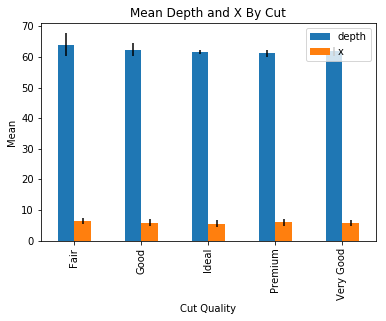

In [18]:
#Graph 1
cut = diamonds.groupby("cut")
means = cut.mean()
errors = cut.std()
means.loc[:,["depth", "x"]].plot(kind='bar', yerr=errors, title="Mean Depth and X By Cut")
plt.xlabel("Cut Quality")
plt.ylabel("Mean")
plt.show()

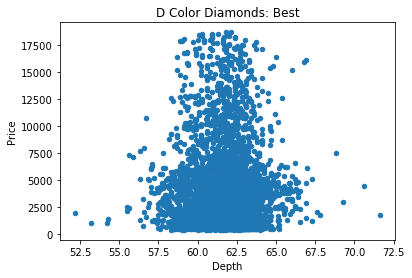

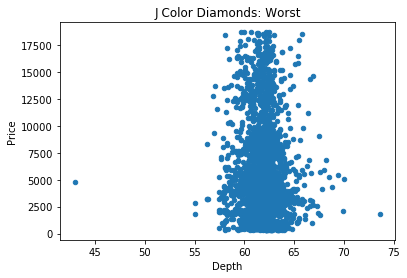

In [32]:
#Graph 2
color = diamonds.groupby("color")
D = color.get_group("D")
E = color.get_group("E")
F = color.get_group("F")
G = color.get_group("G")
H = color.get_group("H")
I = color.get_group("I")
J = color.get_group("J")

D.plot(kind='scatter', x = 'depth', y = 'price', title="D Color Diamonds")
plt.xlabel("Depth")
plt.ylabel("Price")

J.plot(kind='scatter', x = 'depth', y = 'price', title="J Color Diamonds")
plt.xlabel("Depth")
plt.ylabel("Price")

In [33]:
"""
We see several interesting phenomena through these graphs. First, the mean depth and mean X parameter of the 
diamons vary litte with cut quality. Athough there is some standard error, that error is small. Second, we 
see from the second pair of graphs that variance in depth for D colored diamonds is much greater than 
for J colored diamonds. Furthermore, the mean depth of the distribution fo D colored diamonds is less
than the mean for J colored diamonds. Most importanlty, there is very little relationship between the 
depth of the of the diamond and its price, since in both graphs the relationship is near vertical. 
"""

'\nWe see several interesting phenomena through these graphs. First, the mean depth and mean X parameter of the \ndiamons vary litte with cut quality. Athough there is some standard error, that error is small. Second, we \nsee from the second pair of graphs that variance in depth for D colored diamonds is much greater than \nfor J colored diamonds. Furthermore, the mean depth of the distribution fo D colored diamonds is less\nthan the mean for J colored diamonds. Most importanlty, there is very little relationship between the \ndepth of the of the diamond and its price, since in both graphs the relationship is near vertical. \n'

In [57]:
""" Problem 2 """
titanic = pd.read_csv("/Users/Deehrlich/Desktop/BootCamp2017/Computation/Wk2_VisPandas/titanic.csv").loc[:,["Survived","Pclass","Sex","Age","Fare","Embarked"]]
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].mean())
titanic = titanic.dropna()

#Part 1
print(titanic.groupby("Embarked").mean().loc[:,["Survived"]])

#Part 2
print("\n\n")
print(titanic.pivot_table('Survived',index=['Sex'],columns=['Embarked']))

#Part 3
print("\n\n")
print(titanic.pivot_table("Survived", index=["Pclass"], columns=['Embarked']))

age = pd.cut(titanic['Age'], [0,12,18,80])
print("\n\n")
print(titanic.pivot_table("Survived", index=["Pclass", age], columns=['Embarked']))

          Survived
Embarked          
C         0.555556
Q         0.357724
S         0.332968



Embarked         C         Q         S
Sex                                   
female    0.902655  0.616667  0.680412
male      0.305732  0.111111  0.170418



Embarked         C         Q         S
Pclass                                
1.0       0.687943  0.666667  0.559322
2.0       0.571429  0.285714  0.417355
3.0       0.366337  0.353982  0.210526



Embarked                C         Q         S
Pclass Age                                   
1.0    (0, 12]   1.000000       NaN  0.750000
       (12, 18]  0.857143       NaN  0.888889
       (18, 80]  0.676692  0.666667  0.536585
2.0    (0, 12]   1.000000       NaN  1.000000
       (12, 18]  1.000000       NaN  0.312500
       (18, 80]  0.478261  0.285714  0.365854
3.0    (0, 12]   0.750000  0.000000  0.354167
       (12, 18]  0.500000  0.500000  0.234043
       (18, 80]  0.285714  0.362745  0.190476


In [ ]:
"""
The pivot tables explore several interesting relationships between survival rate and embrakment. Passesngers from
location C have much greater surivival rates than those from the other two locations. The next pivot tables,
breaks surival rates down by sex and embarkment and we can see more clearly that both males and females from 
C have higher surival rates than their peers. Breaking down the surival rate by class and place of embarkment,
we see that those from Class 1 have higher surivival rates across the board, however, but the surival rates of 
those in class 2 and 3 have some variance. It is unclear just from the table why passengers in Class 2 from C 
are more likely to survive than those form Q. The data would suggest a relationship between C and class 1, 
as both surive in greater rates, however, there seems to be a relationship between higher surivival rates 
and emarbkment C, even across class. 
"""